#**4. ML with Recurrent Neural Networks**

In this step, We will create text using RNN based on the corpus it was trained on.

Recalling Recurrent Neural Network(RNN) is basically a generalization of feed-forward neural network that has an internal memory. RNNs are a special kind of neural networks that are designed to effectively deal with sequential data. This kind of data includes time series (a list of values of some parameters over a certain period of time) text documents, which can be seen as a sequence of words, or audio, which can be seen as a sequence of sound frequencies over time.
Here, the output from previous step are fed as input to the current step. In traditional neural networks, all the inputs and outputs are independent of each other, but in cases like when it is required to predict the next word of a sentence, the previous words are required and hence there is a need to remember the previous words. 
In other words, Recurrent neural networks are a special type of neural network where the outputs from previous time steps are fed as input to the current time step


In RNN, Cells that are a function of inputs from previous time steps are also known as memory cells.

Previously, The order in which the words appear doesn't really matter but in this case, WHen it comes to generating a meaningful text, The order of the words matter.

And while predicting the next word, the context of the whole text also matters on which the predicted word is very much dependent upon.


The sequence could be very strong but weakens as the context spreads (1 is a lot comparing to 3 but very low compared to 100). It's there but tiny and this is very useful for predicting text where the signal to determine the text is close by.

EG: *"The weather is fine today, I see a beautiful blue ______"*

We automatically think the word "sky" will be in the blank as there's a word sequence of "beautiful" & "blue" there and also the context is weather.


But, for this sentence below, 

*"I lived in Ireland, so at school they made me learn how to speak ___"*

It might sound like the word "Irish" will be in the blank but it's actually Gaelic.

#If we only predict the words based on close to the desired one, We'd miss that completely and end up with bad prediction. 

The key is to get beyond the very short term memory of a RNN with a longer short term memory and a network type called "Long short term memory"(LSTM)

#**Enhancing our memory — Long Short Term Memory Networks (LSTM)**

Long-Short Term Memory networks or LSTMs are a variant of RNN that solve the Long term memory problem of the former.

They have a more complex cell structure than a normal recurrent neuron, that allows them to better regulate how to learn or forget efficiently from the different input sources.

#The key to LSTMs is the cell state (cell memory), the horizontal line running through the top of the diagram, through which the information flows along and the internal mechanism called gates that can regulate the flow of information.

#The cell state is kind of like a conveyor belt. It runs straight down the entire chain, with only some minor linear interactions and it could also be bi-directional


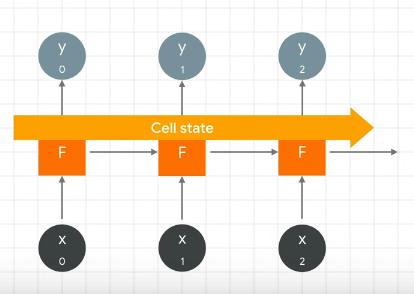

Cell State basically encodes the information of the inputs (relevant info.) that have been observed up to that step (at every step).

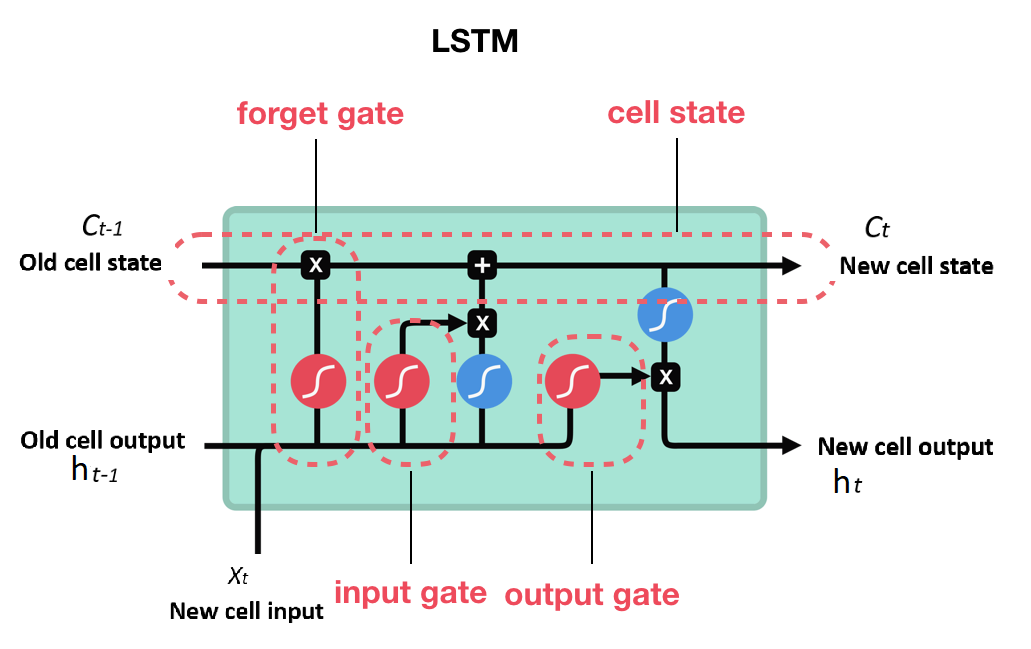

Cell state is a memory of the LSTM cell and hidden state (cell output) is an output of this cell.

Cells do have internal cell state, often abbreviated as “c”, and cells output is what is called a “hidden state”, abbreviated as “h”.
Regular RNNs have just the hidden state and no cell state. Therefore, RNNs have difficulty of accessing information from a long time ago.

Note: Hidden state is an output of the LSTM cell, used for Prediction. It contains the information of previous inputs (from cell state/memory) along with current input (decided according which context is important).

#To know more in details

https://medium.com/@humble_bee/rnn-recurrent-neural-networks-lstm-842ba7205bbf


In [65]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [66]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) #Instanciating a tokenizer

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.num_words, 64),

#Bidirectional = Will loook forward and backward and will find the best parameter for it. 
#Might not always be the best case scenario but is worth experimenting with.

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

print("Note: There are 128 parameters in the bidirectional method. 64 forward, 64 backward.")

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 64)          640000    
                                                                 
 bidirectional_11 (Bidirecti  (None, 128)              66048     
 onal)                                                           
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 714,369
Trainable params: 714,369
Non-trainable params: 0
_________________________________________________________________
Note: There are 128 parameters in the bidirectional method. 64 forward, 64 backward.


We can also stack LSTM layers so that the output of one layers get fed into the next.

#Make sure to put return_sequences=True in all layers that are feeding to the other.

In [67]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) #Instanciating a tokenizer

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.num_words, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)), 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

print("SUmmary of this model will show you the extra parameters that the extra LSTM gives.")

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 64)          640000    
                                                                 
 bidirectional_12 (Bidirecti  (None, None, 128)        66048     
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, 64)               41216     
 onal)                                                           
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 751,489
Trainable params: 751,489
Non-t

#**1. Creating a model and train it with the lyric of traditional irish songs and will make it write a similiar styled poetry using those words.**

#Text

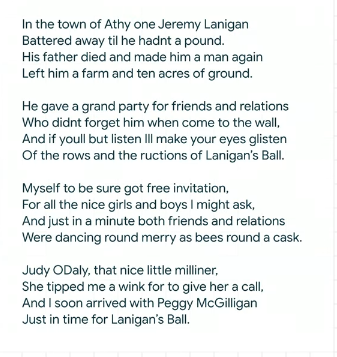

Imports and reading file

In [106]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [107]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2022-04-02 23:43:31--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 74.125.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2022-04-02 23:43:31 (127 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [108]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print()
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

Note: When generating text, We don't need a validation dataset. We will use every bit we have to ty to spot the patterns of where and how the words occur.

So, if we tokenize our entire corpus, There will be no out of vocabulary token. 


We will start ot pad subsentences from the full corpus for which we will need zero token.
Hence, We will add 1 here and will count that token as a valid word.

After having a list of sentences and after tokenizing them, We can turn them into a set of training data. 

In [114]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0] #For each line of the corpus, We will create a token (For one line at a time). This will give me text to sequences for the current line.
                                                       #EG: "In the town of Athy one Jeremy Lenigan" => [4 2 66 8 67 68 69 70]
  for i in range(1, len(token_list)): #Now we will go through this list and generate n_grams from that because we want the model to predict the likely next word. #EG: When you see this one, This word is next. When you see this 2 words, this one is next and so on
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

#print(input_sequences)

Now that we've split the sentences into multiple lists, we need to pad it.
We will start by getting the longest length of the sentences and pad every other sentence with zero make them of the same length.

In [115]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

#print(input_sequences)

Let a matrix be,

[[ 0  0  0  0  0  0  1  2]
 
 [ 0  0  0  0  0  1  2  3]
 
 [ 0  0  0  0  1  2  3  4]
 
 [ 0  0  0  1  2  3  4  5]
 
 [ 0  0  0  1  2  3  4  6]
 
 [ 0  1  2  3  4  5  6  7]
 
 [ 1  2  3  4  5  6  7  8]
 
 [ 0  0  0  0  0  0  9 10]]

-------------------------------------------------------

Then the (X,label) would be,

[[ 0  0  0  0  0  0  1  2] => X = "0  0  0  0  0  0  1" & Label = "2"

 [ 0  0  0  0  0  1  2  3] => X = "0  0  0  0  0  1  2" & Label = "3"

 [ 0  0  0  0  1  2  3  4] => X = "0  0  0  0  1  2  3" & Label = "4"

 [ 0  0  0  1  2  3  4  5] => X = "0  0  0  1  2  3  4" & Label = "5"

 [ 0  0  0  1  2  3  4  6] => X = "0  0  0  1  2  3  4" & Label = "6"

 [ 0  1  2  3  4  5  6  7] => X = "0  1  2  3  4  5  6" & Label = "7"

 [ 1  2  3  4  5  6  7  8] => X = "1  2  3  4  5  6  7" & Label = "8"

 [ 0  0  0  0  0  0  9 10]] =>  X = "0  0  0  0  0  0  9" & Label = "10"

Slicing the list to generate X's and labels

In [116]:
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

#print(xs)
#print()
#print(labels)

We want our Y to be categorical and one hot encoded so we can be able to predict all of the word of our corpus which one is the most likely word to be next in the sequence given the current set of words while training by using *keras categorical*

In [117]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
#print(ys)

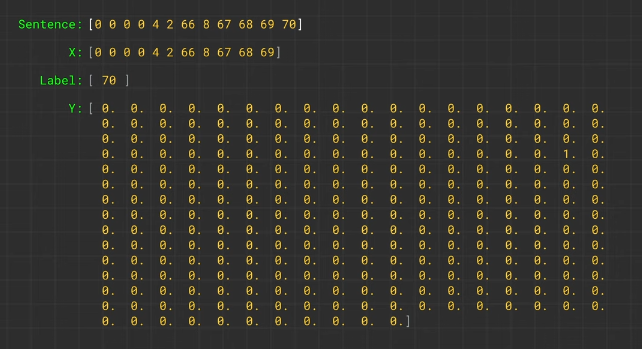

We can see the seventieth(70th) entry is 1 due to label being 70 (70+1 = 71) while everything else is 0.


#Now we have our features and labels, Let's train neural network with all of our data



In [118]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [119]:
print(xs[6])
print(ys[6])
print(xs[5])
print(ys[5])
print(tokenizer.word_index)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
[0. 0. 0. ... 0. 0. 0.]
[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]
{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76

Defining the model

In [120]:
model = Sequential()
model.add(Embedding(total_words, 240, input_length=max_sequence_len-1)) #parameters(number_of_unique_words_in_the_corpus, input_length = length of everything but the label(1) )
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax')) #Output is a dense with total number of words & activation = softmax because Softmax converts a vector of values to a probability distribution.
adam = Adam(lr=0.01) #Defining an optimizer
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) #loss='categorical_crossentropy' because this is categorical with a lots of classes, We will need a categorical loss function such as "categorical_crossentropy"
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training the model

In [121]:
history = model.fit(xs, ys, epochs=100, verbose=1)
print(model.summary())
print()
print(model)

Epoch 1/100
377/377 [==============================] - 39s 93ms/step - loss: 6.7132 - accuracy: 0.0768
Epoch 2/100
377/377 [==============================] - 35s 93ms/step - loss: 6.2124 - accuracy: 0.1067
Epoch 3/100
377/377 [==============================] - 35s 93ms/step - loss: 5.6794 - accuracy: 0.1376
Epoch 4/100
377/377 [==============================] - 35s 93ms/step - loss: 4.6464 - accuracy: 0.1922
Epoch 5/100
377/377 [==============================] - 35s 94ms/step - loss: 3.6895 - accuracy: 0.2653
Epoch 6/100
377/377 [==============================] - 36s 94ms/step - loss: 3.2068 - accuracy: 0.3266
Epoch 7/100
377/377 [==============================] - 35s 93ms/step - loss: 2.6695 - accuracy: 0.4006
Epoch 8/100
377/377 [==============================] - 35s 93ms/step - loss: 2.3290 - accuracy: 0.4591
Epoch 9/100
377/377 [==============================] - 35s 93ms/step - loss: 2.0698 - accuracy: 0.5110
Epoch 10/100
377/377 [==============================] - 35s 93ms/step - l

The initial accuracy was really small and it increased from there with time.

(It's showing 1 here because this code cell has been run a few times and hence, the model is already trained)

After being trainer, We can now pass a sequence to this model and it will give us the value.

We can use this to generate a poetry. Take a sequence and get the next value. Add that to the sequence, Pass that to the model and get the next value.
Now, add that to the sequence, Pass that to the model and get the next value and so on (RNN)


In [122]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predict_x=model.predict(token_list)
  classes_x =np.argmax(predict_x,axis=1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == classes_x:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this i be long neer could be lazy by or else again should de their mantle odds he bore a true friends came and put me pretty fair maid sing most charming again native eye treads the upwards way wid here water crying round ye above we were entwine farewell out city where we black velvet band too fine groves him beneath the poor true friends welcome quite beneath than only today within little nights any love corporal casey him again say theres seen he loves down him again everywhere men of freedom an town to see again native land raising
